In [38]:
import pandas as pd
import numpy
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt

In [39]:
df=pd.read_csv("salaries.csv")
df.head(5)

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [40]:
inputs=df.drop("salary_more_then_100k",axis='columns')
target=df['salary_more_then_100k']

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [43]:
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_company.fit_transform(inputs['job'])
inputs['degree_n']=le_company.fit_transform(inputs['degree'])

In [44]:
inputs_n=inputs.drop(['company','job','degree'],axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [45]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [46]:
model=tree.DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(inputs_n,target,test_size=0.5)

In [47]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
model.score(x_test,y_test)

0.875

In [49]:
x_test

,company_n,job_n,degree_n
12,1,0,0
7,0,1,0
9,0,0,1
11,1,2,1
13,1,0,1
0,2,2,0
8,0,0,0
14,1,1,0


In [50]:
predicted=model.predict(x_test)

Text(70.72222222222221, 0.5, 'Truth')

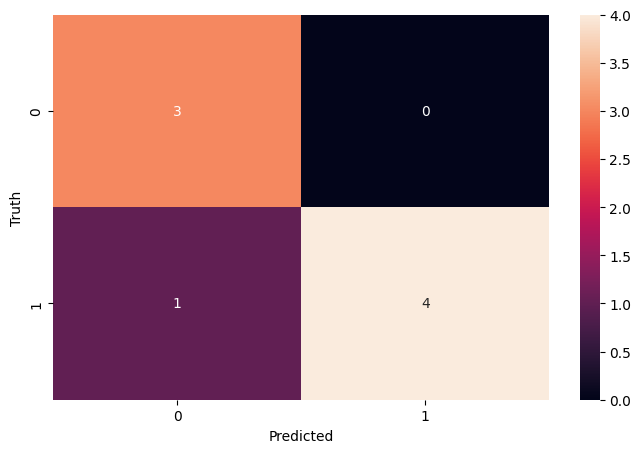

In [51]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,predicted)
import seaborn as sn
plt.figure(figsize=(8,5))
sn.heatmap(cn,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')